# Question 1

## Print the highest weekly sales for each 'department' in the 'walmart' dataframe -
## Limit your results to the top five departments, in descending order.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df_walmart = pd.read_csv('sales_subset.csv', delimiter=',')
df_walmart.drop(columns='Unnamed: 0', axis=1, inplace=True)
df_walmart.head(10)

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808
5,1,A,1,2010-07-02,16333.14,False,27.172222,0.705076,7.787
6,1,A,1,2010-08-06,17508.41,False,30.644444,0.693980,7.787
7,1,A,1,2010-09-03,16241.78,False,27.338889,0.680772,7.787
8,1,A,1,2010-10-01,20094.19,False,22.161111,0.687640,7.838
9,1,A,1,2010-11-05,34238.88,False,14.855556,0.710359,7.838


In [15]:
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store                 10774 non-null  int64  
 1   type                  10774 non-null  object 
 2   department            10774 non-null  int64  
 3   date                  10774 non-null  object 
 4   weekly_sales          10774 non-null  float64
 5   is_holiday            10774 non-null  bool   
 6   temperature_c         10774 non-null  float64
 7   fuel_price_usd_per_l  10774 non-null  float64
 8   unemployment          10774 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 684.0+ KB


In [22]:
df_walmart.head(5)

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [28]:
df_grouped = df_walmart.groupby('department')['weekly_sales'].max()
df_grouped

department
1     149743.97
2     123952.48
3      89316.82
4      66912.92
5     103531.25
        ...    
95    213042.66
96     45278.54
97     45017.96
98     24273.74
99      5350.00
Name: weekly_sales, Length: 80, dtype: float64

In [32]:
df_grouped = df_walmart.groupby('department').agg({'weekly_sales': 'max'}).sort_values('weekly_sales', ascending=False)
df_grouped.head(5)

,weekly_sales
department,
92,293966.05
72,232558.51
95,213042.66
90,166263.81
91,162497.78


# Question 2

## What was the total 'nb_sold' of organic avocados in 2017 in the 'avocado' DataFrame?

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
df_avos = pd.read_pickle(r'avoplotto.pkl')
df_avos.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


In [39]:
df_avos.dtypes

date          object
type          object
year           int64
avg_price    float64
size          object
nb_sold      float64
dtype: object

In [40]:
df_avos['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [54]:
boolean_condition = ((df_avos['type'] == 'organic') & (df_avos['year'] == 2017))

In [56]:
df_avos_org_2017 = df_avos[boolean_condition]
df_avos_org_2017

,date,type,year,avg_price,size,nb_sold
273,2017-12-31,organic,2017,1.52,small,120545.76
274,2017-12-24,organic,2017,1.64,small,103199.55
275,2017-12-17,organic,2017,1.57,small,94905.86
276,2017-12-10,organic,2017,1.54,small,94279.26
277,2017-12-03,organic,2017,1.62,small,99317.88
...,...,...,...,...,...,...
997,2017-01-29,organic,2017,1.43,extra_large,3524.96
998,2017-01-22,organic,2017,1.37,extra_large,6707.82
999,2017-01-15,organic,2017,1.44,extra_large,8750.08
1000,2017-01-08,organic,2017,1.43,extra_large,8697.35


In [57]:
df_avos['nb_sold'].sum()

4226122969.34

# Question 3

## Create a bar plot of the total number of homeless people by region in the 'homelessness'

## DataFrame - order the bars in descending order and create a horizontal bar chart too.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
df_homeless = pd.read_csv('homelessness.csv')
df_homeless.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
0,0,East South Central,Alabama,2570.0,864.0,4887681
1,1,Pacific,Alaska,1434.0,582.0,735139
2,2,Mountain,Arizona,7259.0,2606.0,7158024
3,3,West South Central,Arkansas,2280.0,432.0,3009733
4,4,Pacific,California,109008.0,20964.0,39461588


In [61]:
df_homeless.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [62]:
df_homeless.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          51 non-null     object 
 1   state           51 non-null     object 
 2   individuals     51 non-null     float64
 3   family_members  51 non-null     float64
 4   state_pop       51 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.1+ KB


In [71]:
df_homeless_region = df_homeless.groupby('region').agg({'individuals': 'sum'}).sort_values('individuals')

In [72]:
df_homeless_region

,individuals
region,
East South Central,12468.0
New England,12903.0
West North Central,13971.0
East North Central,25406.0
West South Central,26842.0
Mountain,28491.0
South Atlantic,52260.0
Mid-Atlantic,54038.0
Pacific,142136.0


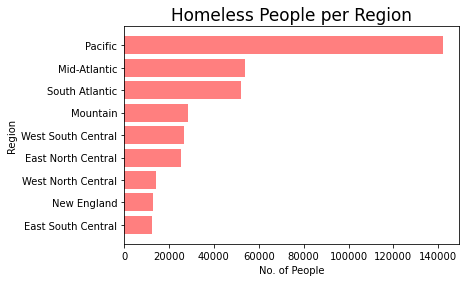

In [76]:
plt.title('Homeless People per Region', fontsize=17)
plt.xlabel('No. of People')
plt.ylabel('Region')
plt.barh(df_homeless_region.index,df_homeless_region['individuals'], color='r', alpha=0.5)
plt.savefig('Homeless people per region.png', bbox_inches='tight')